<a href="https://colab.research.google.com/github/KIM-1994/HOya/blob/main/%EA%B3%B5%EB%B6%80/Pandas_10%EB%B6%84_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas 10분 완성

**역자 주 : 본 자료는 10 Minutes to Pandas (하단 원문 링크 참조)의 한글 번역 자료로, 번역은 데잇걸즈2 프로그램 교육생 모두가 함께 진행하였습니다. 데잇걸즈2는 과학기술정보통신부와 한국정보화진흥원이 주관하는 SW여성인재 빅데이터 분석 교육과정으로, 상세한 소개는 페이스북 페이지를 참조 부탁 드립니다.**

**본 자료의 저작권은 [BSD-3-Clause](https://opensource.org/licenses/BSD-3-Clause)인 점을 참조하여 주세요.**

**This documentation is a Korean translation material of ‘10 Minutes to Pandas’. Every member of DATAITGIRLS2 program participated in the translation. If you want to know about DATAITGIRLS2 program, please visit [DATAITGIRLS2 program’s facebook page](https://ko-kr.facebook.com/dataitgirls/).**

**The copyright conditions of this documentation are BSD-3-Clause.**

**역자 주 (참조 자료) : [10 Minuts to Pandas 원문](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html), [판다스 개발자의 PyCon Korea 2016 발표](https://www.youtube.com/watch?v=O5uFF1H0R0M) : Keynote, Pandas 10분 완성 원문의 인터넷 강의 영상, Pandas Cheat Sheet**



---

이 소개서는 주로 신규 사용자를 대상으로 한 판다스에 대한 간략한 소개로, 아래와 같이 구성되어 있습니다. 더 자세한 방법은[ Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)에서 볼 수 있습니다.



1.   Object Creation (객체 생성)
2.   Viewing Data (데이터 확인하기)
3.   Selection (선택)
4.   Missing Data (결측치)
5.   Operation (연산)
6.   Merge (병합)
7.   Grouping (그룹화)
8.   Reshaping (변형)
9.   Time Series (시계열)
10.  Categoricals (범주화)
11.  Plotting (그래프)
12.  Getting Data In / Out (데이터 입 / 출력)
13.  Gotchas (잡았다!)



---


일반적으로 각 패캐지는 pd, np, plt라는 이름으로 불러옵니다.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Object Creation (객체 생성)

**[데이터 구조 소개 섹션](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html)을 참조하세요.**

**Pandas는 값을 가지고 있는 리스트를 통해 [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러올 것입니다.**

In [ ]:
a = pd.Series([1,3,5,np.nan,6,8])
a

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만듭니다.

In [ ]:
dates = pd.date_range('20130101', periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.784197,1.077572,0.139746,-1.198050
2013-01-02,-2.232713,0.528458,0.346990,1.620199
2013-01-03,0.990908,0.856409,0.687702,1.893413
2013-01-04,-1.128600,-2.073517,0.938502,0.216336
2013-01-05,-1.562463,-1.562747,0.597687,-0.685352
2013-01-06,0.117143,0.162055,0.453307,0.491534


Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터프레임을 만듭니다.

In [ ]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


데이터프레임 결과물의 열은 다양한 데이터 타입 (dtypes)으로 구성됩니다.

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython을 이용하고 계시다면 (공용 속성을 포함한) 열 이름에 대한 Tap 자동완성 기능이 자동으로 활성화 됩니다. 다음은 완성될 속성에 대한 부분집합 (subset)입니다.

**역자 주 : 아래 제시된 코드의 경우, IPython이 아닌 환경 (Google Colaboratory, Jupyter 등)에서는 사용이 불가능한 코드인 점에 주의하세요.**

In [ ]:
# df2.<TAB>

**역자 주 : IPython에서 실행하면 다음과 같은 결과값이 나옵니다.**

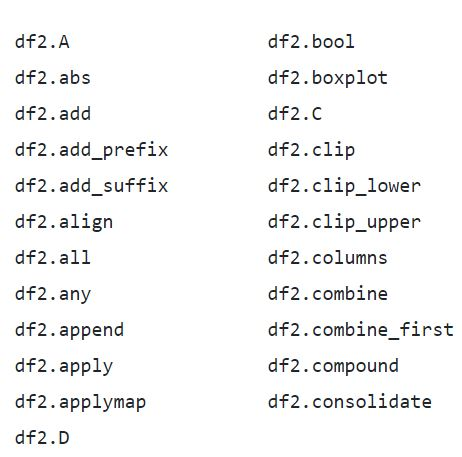

보시다시피 A, B, C, D열이 탭 자동완성 기능으로 실행됩니다. 물론 E도 있습니다. 나머지 속성들은 간결하게 잘라 버렸습니다.

## 2. Viewing Data (데이터 확인하기)

**[Basic Section](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)을 참조하세요.**


**데이터프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때에 사용하는 방법은 다음과 같습니다.**

**역자 주: 괄호() 안에는 숫자가 들어갈 수도 있고 안 들어갈 수도 있습니다. 숫자가 들어간다면, 윗 / 마지막 줄의 특정 줄을 불러올 수 있습니다. 숫자가 들어가지 않다면, 기본값인 5로 처리됩니다.**


*예시*

In [ ]:
df.tail(3) # 끝에서 마지막 3줄을 불러옴
df.tail() # 끝에서 마지막 5줄 불러옴
df.head()

,A,B,C,D
2013-01-01,-1.784197,1.077572,0.139746,-1.198050
2013-01-02,-2.232713,0.528458,0.346990,1.620199
2013-01-03,0.990908,0.856409,0.687702,1.893413
2013-01-04,-1.128600,-2.073517,0.938502,0.216336
2013-01-05,-1.562463,-1.562747,0.597687,-0.685352


In [ ]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.128600,-2.073517,0.938502,0.216336
2013-01-05,-1.562463,-1.562747,0.597687,-0.685352
2013-01-06,0.117143,0.162055,0.453307,0.491534


인덱스 (index), 열 (column) 그리고 numpy 데이터에 대한 세부 정보를 봅니다.

In [54]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [55]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [56]:
df.values

array([[-1.78419675,  1.07757237,  0.13974557, -1.19804997],
       [-2.23271321,  0.52845771,  0.34698955,  1.6201991 ],
       [ 0.99090803,  0.85640899,  0.68770189,  1.89341261],
       [-1.12860021, -2.07351673,  0.93850151,  0.216336  ],
       [-1.56246275, -1.56274735,  0.5976873 , -0.68535186],
       [ 0.11714315,  0.16205511,  0.4533069 ,  0.49153355]])

[describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)는 데이터의 대략적인 통계적 정보 요약을 보여줍니다.

In [57]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.933320,-0.168628,0.527322,0.389680
std,1.237133,1.324475,0.278552,1.224123
min,-2.232713,-2.073517,0.139746,-1.198050
25%,-1.728763,-1.131547,0.373569,-0.459930
50%,-1.345531,0.345256,0.525497,0.353935
75%,-0.194293,0.774421,0.665198,1.338033
max,0.990908,1.077572,0.938502,1.893413


데이터를 전치합니다.

In [58]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.784197,-2.232713,0.990908,-1.128600,-1.562463,0.117143
B,1.077572,0.528458,0.856409,-2.073517,-1.562747,0.162055
C,0.139746,0.346990,0.687702,0.938502,0.597687,0.453307
D,-1.198050,1.620199,1.893413,0.216336,-0.685352,0.491534


축 별로 정렬.

In [59]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,-1.198050,0.139746,1.077572,-1.784197
2013-01-02,1.620199,0.346990,0.528458,-2.232713
2013-01-03,1.893413,0.687702,0.856409,0.990908
2013-01-04,0.216336,0.938502,-2.073517,-1.128600
2013-01-05,-0.685352,0.597687,-1.562747,-1.562463
2013-01-06,0.491534,0.453307,0.162055,0.117143


값 별로 정렬.

In [60]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-04,-1.128600,-2.073517,0.938502,0.216336
2013-01-05,-1.562463,-1.562747,0.597687,-0.685352
2013-01-06,0.117143,0.162055,0.453307,0.491534
2013-01-02,-2.232713,0.528458,0.346990,1.620199
2013-01-03,0.990908,0.856409,0.687702,1.893413
2013-01-01,-1.784197,1.077572,0.139746,-1.198050


## 3. Selection (선택)

**주석 (Note) : 선택과 설정을 위한 Python / Numpy의 표준화된 표현들이 직관적이며, 코드 작성을 위한 양방향 작업에 유용하지만 우리는 Pandas에 최적화된 데이터 접근 방법인 .at, .iat, .loc 및 .iloc 을 추천합니다.**

[데이터 인덱싱 및 선택](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) 문서와 [다중 인덱싱 / 심화 인덱싱](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) 문서를 참조하세요.


### Getting (데이터 얻기)
df.A 와 동일한 Series를 생성하는 단일 열을 선택합니다.

In [63]:
df['A']

2013-01-01   -1.784197
2013-01-02   -2.232713
2013-01-03    0.990908
2013-01-04   -1.128600
2013-01-05   -1.562463
2013-01-06    0.117143
Freq: D, Name: A, dtype: float64

행을 분할하는 [ ]를 통해 선택합니다.

In [64]:
df[0:3]

,A,B,C,D
2013-01-01,-1.784197,1.077572,0.139746,-1.198050
2013-01-02,-2.232713,0.528458,0.346990,1.620199
2013-01-03,0.990908,0.856409,0.687702,1.893413


In [65]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-2.232713,0.528458,0.346990,1.620199
2013-01-03,0.990908,0.856409,0.687702,1.893413
2013-01-04,-1.128600,-2.073517,0.938502,0.216336


### Selection by Label (Label 을 통한 선택)
[Label을 통한 선택](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)에서 더 많은 내용을 확인하세요.

라벨을 사용하여 횡단면을 얻습니다.

In [66]:
df.loc[dates[0]]

A   -1.784197
B    1.077572
C    0.139746
D   -1.198050
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 여러 축 (의 데이터)을 얻습니다.

In [67]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,-1.784197,1.077572
2013-01-02,-2.232713,0.528458
2013-01-03,0.990908,0.856409
2013-01-04,-1.128600,-2.073517
2013-01-05,-1.562463,-1.562747
2013-01-06,0.117143,0.162055


양쪽 종단점을 포함한 라벨 슬라이싱을 봅니다.

In [68]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,-2.232713,0.528458
2013-01-03,0.990908,0.856409
2013-01-04,-1.128600,-2.073517


반환되는 객체의 차원를 줄입니다.

In [69]:
df.loc['20130102',['A','B']]

A   -2.232713
B    0.528458
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻습니다.

In [70]:
df.at[dates[0],'A']

-1.7841967522604094

### Selection by Position (위치로 선택하기)
자세한 내용은 [위치로 선택하기](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)를 참고해주세요.

넘겨받은 정수의 위치를 기준으로 선택합니다.

In [71]:
df.iloc[3]

A   -1.128600
B   -2.073517
C    0.938502
D    0.216336
Name: 2013-01-04 00:00:00, dtype: float64

정수로 표기된 슬라이스들을 통해, numpy / python과 유사하게 작동합니다.

In [72]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.128600,-2.073517
2013-01-05,-1.562463,-1.562747


정수로 표기된 위치값의 리스트들을 통해, numpy / python의 스타일과 유사해집니다.

In [73]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-2.232713,0.346990
2013-01-03,0.990908,0.687702
2013-01-05,-1.562463,0.597687


명시적으로 행을 나누고자 하는 경우입니다.

In [74]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-2.232713,0.528458,0.346990,1.620199
2013-01-03,0.990908,0.856409,0.687702,1.893413


명시적으로 열을 나누고자 하는 경우입니다.

In [75]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.077572,0.139746
2013-01-02,0.528458,0.346990
2013-01-03,0.856409,0.687702
2013-01-04,-2.073517,0.938502
2013-01-05,-1.562747,0.597687
2013-01-06,0.162055,0.453307


명시적으로 (특정한) 값을 얻고자 하는 경우입니다.

In [76]:
df.iloc[1,1]

0.5284577127556394

스칼라 값을 빠르게 얻는 방법입니다 (위의 방식과 동일합니다).

In [77]:
df.iat[1,1]

0.5284577127556394

### Boolean Indexing
데이터를 선택하기 위해 단일 열의 값을 사용합니다.

In [78]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.990908,0.856409,0.687702,1.893413
2013-01-06,0.117143,0.162055,0.453307,0.491534


Boolean 조건을 충족하는 데이터프레임에서 값을 선택합니다.

In [79]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.077572,0.139746,NaN
2013-01-02,NaN,0.528458,0.346990,1.620199
2013-01-03,0.990908,0.856409,0.687702,1.893413
2013-01-04,NaN,NaN,0.938502,0.216336
2013-01-05,NaN,NaN,0.597687,NaN
2013-01-06,0.117143,0.162055,0.453307,0.491534


필터링을 위한 메소드 [isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)을 사용합니다.

In [80]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.784197,1.077572,0.139746,-1.198050,one
2013-01-02,-2.232713,0.528458,0.346990,1.620199,one
2013-01-03,0.990908,0.856409,0.687702,1.893413,two
2013-01-04,-1.128600,-2.073517,0.938502,0.216336,three
2013-01-05,-1.562463,-1.562747,0.597687,-0.685352,four
2013-01-06,0.117143,0.162055,0.453307,0.491534,three


In [81]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.990908,0.856409,0.687702,1.893413,two
2013-01-05,-1.562463,-1.562747,0.597687,-0.685352,four


### Setting (설정)
새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됩니다.

In [84]:
s1 = pd.Series([1,2,3,4,5,6], index = pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [85]:
df['F'] = s1

라벨에 의해 값을 설정합니다.

In [87]:
df.at[dates[0], 'A'] = 0

위치에 의해 값을 설정합니다.

In [88]:
df.iat[0,1] = 0

Numpy 배열을 사용한 할당에 의해 값을 설정합니다.

In [89]:
df.loc[:,'D'] = np.array([5] * len(df))

위 설정대로 작동한 결과입니다.

In [90]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.139746,5,NaN
2013-01-02,-2.232713,0.528458,0.346990,5,1.0
2013-01-03,0.990908,0.856409,0.687702,5,2.0
2013-01-04,-1.128600,-2.073517,0.938502,5,3.0
2013-01-05,-1.562463,-1.562747,0.597687,5,4.0
2013-01-06,0.117143,0.162055,0.453307,5,5.0


where 연산을 설정합니다.

In [91]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.139746,-5,NaN
2013-01-02,-2.232713,-0.528458,-0.346990,-5,-1.0
2013-01-03,-0.990908,-0.856409,-0.687702,-5,-2.0
2013-01-04,-1.128600,-2.073517,-0.938502,-5,-3.0
2013-01-05,-1.562463,-1.562747,-0.597687,-5,-4.0
2013-01-06,-0.117143,-0.162055,-0.453307,-5,-5.0


## 4. Missing Data (결측치)

**Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용합니다. 이 방법은 기본 설정값이지만 계산에는 포함되지 않습니다. [Missing data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)을 참조하세요.**

**Reindexing으로 지정된 축 상의 인덱스를 변경 / 추가 / 삭제할 수 있습니다. Reindexing은 데이터의 복사본을 반환합니다.**


In [92]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.139746,5,NaN,1.0
2013-01-02,-2.232713,0.528458,0.346990,5,1.0,1.0
2013-01-03,0.990908,0.856409,0.687702,5,2.0,NaN
2013-01-04,-1.128600,-2.073517,0.938502,5,3.0,NaN


In [93]:
df1.dropna(how='any') # 결측치를 가지고 있는 행들을 지웁니다.

,A,B,C,D,F,E
2013-01-02,-2.232713,0.528458,0.34699,5,1.0,1.0


In [94]:
df1.fillna(value=5) # 결측치를 채워 넣습니다.

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.139746,5,5.0,1.0
2013-01-02,-2.232713,0.528458,0.346990,5,1.0,1.0
2013-01-03,0.990908,0.856409,0.687702,5,2.0,5.0
2013-01-04,-1.128600,-2.073517,0.938502,5,3.0,5.0


In [95]:
pd.isna(df1) # nan인 값에 boolean을 통한 표식을 얻습니다.
             # 역자 주 : 데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수입니다.

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 5. Operation (연산)
[이진 (Binary) 연산의 기본 섹션](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)을 참조하세요.



### Stats (통계)
일반적으로 결측치를 제외한 후 연산됩니다.

기술통계를 수행합니다.

In [96]:
df.mean()

A   -0.635954
B   -0.348224
C    0.527322
D    5.000000
F    3.000000
dtype: float64

In [97]:
df.mean(1) # 다른 축에서 동일한 연산을 수행합니다.

2013-01-01    1.284936
2013-01-02    0.928547
2013-01-03    1.907004
2013-01-04    1.147277
2013-01-05    1.294495
2013-01-06    2.146501
Freq: D, dtype: float64

In [100]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s
# 정렬이 필요하며, 차원이 다른 객체로 연산해보겠습니다. 또한, pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅됩니다.
# 역자 주 : broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [101]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.009092,-0.143591,-0.312298,4.0,1.0
2013-01-04,-4.128600,-5.073517,-2.061498,2.0,0.0
2013-01-05,-6.562463,-6.562747,-4.402313,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply (적용)


In [102]:
df.apply(np.cumsum) # 데이터에 함수를 적용합니다.

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.139746,5,NaN
2013-01-02,-2.232713,0.528458,0.486735,10,1.0
2013-01-03,-1.241805,1.384867,1.174437,15,3.0
2013-01-04,-2.370405,-0.688650,2.112939,20,6.0
2013-01-05,-3.932868,-2.251397,2.710626,25,10.0
2013-01-06,-3.815725,-2.089342,3.163933,30,15.0


In [103]:
df.apply(lambda x: x.max() - x.min())

A    3.223621
B    2.929926
C    0.798756
D    0.000000
F    4.000000
dtype: float64

### Histogramming (히스토그래밍)
더 많은 내용은 [Histogramming and Discretization (히스토그래밍과 이산화)](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) 항목을 참조하세요.

In [104]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    5
2    2
3    5
4    4
5    1
6    4
7    5
8    1
9    0
dtype: int64

In [105]:
s.value_counts()

5    3
4    2
1    2
6    1
2    1
0    1
dtype: int64

### String Methods (문자열 메소드)
Series는 다음의 코드와 같이 문자열 처리 메소드 모음 (set)을 가지고 있습니다.
이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함되어 있습니다.

문자열의 패턴 일치 확인은 기본적으로 정규 표현식을 사용하며, 몇몇 경우에는 항상 정규 표현식을 사용함에 유의하십시오.

좀 더 자세한 내용은 [벡터화된 문자열 메소드](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) 부분에서 확인할 수 있습니다.

In [106]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6. Merge (병합)







### Concat (연결)
결합 (join) / 병합 (merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas 에서 제공합니다.

[Merging](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) 부분을 참조하세요.

[concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)으로 pandas 객체를 연결합니다.

In [107]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.733578,1.228137,-1.833701,-0.952756
1,0.391078,0.721598,-1.986794,1.527362
2,-0.625992,3.057374,1.141255,-0.734184
3,-0.408969,0.678740,0.560878,-0.050654
4,1.058433,1.206137,-0.500783,-0.115460
5,-0.426039,0.226530,-2.209731,0.195165
6,1.344975,-0.203215,1.760650,-0.673908
7,0.052268,-0.609325,1.352174,0.576748
8,-0.303488,-0.922569,0.841751,0.385337
9,1.374013,0.740030,-1.436092,-1.591320


In [108]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.733578,1.228137,-1.833701,-0.952756
1,0.391078,0.721598,-1.986794,1.527362
2,-0.625992,3.057374,1.141255,-0.734184
3,-0.408969,0.678740,0.560878,-0.050654
4,1.058433,1.206137,-0.500783,-0.115460
5,-0.426039,0.226530,-2.209731,0.195165
6,1.344975,-0.203215,1.760650,-0.673908
7,0.052268,-0.609325,1.352174,0.576748
8,-0.303488,-0.922569,0.841751,0.385337
9,1.374013,0.740030,-1.436092,-1.591320


### Join (결합)
SQL 방식으로 병합합니다. [데이터베이스 스타일 결합](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) 부분을 참고하세요.

In [109]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [110]:
right

,key,rval
0,foo,4
1,foo,5


In [111]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [112]:
# 다른 예시입니다.
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [113]:
right

,key,rval
0,foo,4
1,bar,5


In [114]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append (추가)
데이터프레임에 행을 추가합니다. [Appending](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) 부분을 참조하세요.

In [115]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1.379226,-0.608122,-0.800055,-1.816816
1,0.537774,-0.364637,-2.658569,0.285823
2,0.076924,-1.007423,-1.680829,0.707108
3,-0.490647,-1.311245,-0.424570,-0.209350
4,-0.397407,0.489723,-2.312983,0.151319
5,-1.166020,-0.992152,0.643036,-0.474378
6,1.601418,0.385410,2.794652,0.746820
7,0.989776,1.117094,0.686266,0.720299


In [116]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,1.379226,-0.608122,-0.800055,-1.816816
1,0.537774,-0.364637,-2.658569,0.285823
2,0.076924,-1.007423,-1.680829,0.707108
3,-0.490647,-1.311245,-0.424570,-0.209350
4,-0.397407,0.489723,-2.312983,0.151319
5,-1.166020,-0.992152,0.643036,-0.474378
6,1.601418,0.385410,2.794652,0.746820
7,0.989776,1.117094,0.686266,0.720299
8,-0.490647,-1.311245,-0.424570,-0.209350


## 7. Grouping (그룹화)

**그룹화는 다음 단계 중 하나 이상을 포함하는 과정을 가리킵니다.**
  + 몇몇 기준에 따라 여러 그룹으로 데이터를 **분할 (splitting)**
  + 각 그룹에 독립적으로 함수를 **적용 (applying)**
  + 결과물들을 하나의 데이터 구조로 **결합 (combining)**

  자세한 내용은 [그룹화](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) 부분을 참조하세요.

In [117]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,0.449320,1.374187
1,bar,one,2.017928,-1.962633
2,foo,two,-1.055495,0.912869
3,bar,three,0.215963,-1.864048
4,foo,two,-0.991970,0.586371
5,bar,two,-0.113300,-0.402824
6,foo,one,0.055763,-1.782163
7,foo,three,2.547896,-1.241989


생성된 데이터프레임을 그룹화한 후 각 그룹에 [sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) 함수를 적용합니다.

In [118]:
df.groupby('A').sum()

,C,D
A,,
bar,2.120590,-4.229506
foo,1.005513,-0.150726


In [119]:
# 여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성됩니다. 여기에도 sum 함수를 적용할 수 있습니다.
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    2.017928 -1.962633
    three  0.215963 -1.864048
    two   -0.113300 -0.402824
foo one    0.505083 -0.407977
    three  2.547896 -1.241989
    two   -2.047465  1.499240

## 8. Reshaping (변형)

[계층적 인덱싱](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) 및 [변형](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html) 부분을 참조하세요.

### Stack (스택)

In [120]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2  =  df[:4]
df2

A         B
first second                    
bar   one    -1.017002 -2.503916
      two    -0.800330 -1.603330
baz   one     0.559939  0.995776
      two     0.143518  0.222902

[stack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html) 메소드는 데이터프레임 열들의 계층을 “압축”합니다.



In [121]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.017002
               B   -2.503916
       two     A   -0.800330
               B   -1.603330
baz    one     A    0.559939
               B    0.995776
       two     A    0.143518
               B    0.222902
dtype: float64

“Stack된” 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우, [stack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)의 역 연산은 [unstack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)이며, 기본적으로 **마지막 계층**을 unstack합니다.

In [122]:
stacked.unstack()

A         B
first second                    
bar   one    -1.017002 -2.503916
      two    -0.800330 -1.603330
baz   one     0.559939  0.995776
      two     0.143518  0.222902

In [123]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.017002 -0.800330
      B -2.503916 -1.603330
baz   A  0.559939  0.143518
      B  0.995776  0.222902

In [124]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.017002  0.559939
       B -2.503916  0.995776
two    A -0.800330  0.143518
       B -1.603330  0.222902

### Pivot Tables (피봇 테이블)

[피봇 테이블](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html) 부분을 참조하세요.


In [125]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df


,A,B,C,D,E
0,one,A,foo,-0.175164,1.044611
1,one,B,foo,0.282403,0.958270
2,two,C,foo,-0.534821,0.715206
3,three,A,bar,-0.524857,1.907144
4,one,B,bar,-1.387544,-0.819291
5,one,C,bar,-2.779696,-1.790588
6,two,A,foo,-1.631109,1.656552
7,three,B,foo,-0.303848,0.060369
8,one,C,foo,0.160134,-1.700891
9,one,A,bar,0.860555,-0.273484


In [126]:
# 이 데이터로부터 피봇 테이블을 매우 쉽게 생성할 수 있습니다.
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.860555 -0.175164
      B -1.387544  0.282403
      C -2.779696  0.160134
three A -0.524857       NaN
      B       NaN -0.303848
      C  0.780834       NaN
two   A       NaN -1.631109
      B  0.408618       NaN
      C       NaN -0.534821

## 9. Time Series (시계열)
**Pandas는 자주 일어나는 변환 (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공합니다. 이는 재무 (금융) 응용에서 매우 일반적이지만 이에 국한되지는 않습니다. [시계열](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) 부분을 참고하세요.**

In [127]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    22496
Freq: 5T, dtype: int64

In [128]:
# 시간대를 표현합니다.
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.939946
2012-03-07   -0.789702
2012-03-08   -1.690984
2012-03-09   -0.245848
2012-03-10   -1.418156
Freq: D, dtype: float64

In [129]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.939946
2012-03-07 00:00:00+00:00   -0.789702
2012-03-08 00:00:00+00:00   -1.690984
2012-03-09 00:00:00+00:00   -0.245848
2012-03-10 00:00:00+00:00   -1.418156
Freq: D, dtype: float64

In [130]:
# 다른 시간대로 변환합니다.
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.939946
2012-03-06 19:00:00-05:00   -0.789702
2012-03-07 19:00:00-05:00   -1.690984
2012-03-08 19:00:00-05:00   -0.245848
2012-03-09 19:00:00-05:00   -1.418156
Freq: D, dtype: float64

In [131]:
# 시간 표현 ↔ 기간 표현으로 변환합니다.
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.052905
2012-02-29   -1.134462
2012-03-31    0.083476
2012-04-30    0.734212
2012-05-31    0.359874
Freq: M, dtype: float64

In [132]:
ps = ts.to_period()
ps

2012-01   -1.052905
2012-02   -1.134462
2012-03    0.083476
2012-04    0.734212
2012-05    0.359874
Freq: M, dtype: float64

In [133]:
ps.to_timestamp()

2012-01-01   -1.052905
2012-02-01   -1.134462
2012-03-01    0.083476
2012-04-01    0.734212
2012-05-01    0.359874
Freq: MS, dtype: float64

In [134]:
# 기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줍니다. 
# 다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환합니다.
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()


1990-03-01 09:00   -1.337905
1990-06-01 09:00    0.918601
1990-09-01 09:00   -0.581719
1990-12-01 09:00    0.163105
1991-03-01 09:00   -1.178317
Freq: H, dtype: float64

## 10. Categoricals (범주화)
**Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다. [범주형 소개](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) 와 [API 문서](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) 부분을 참조하세요.**

In [135]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [136]:
# 가공하지 않은 성적을 범주형 데이터로 변환합니다.
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [138]:
# 범주에 더 의미 있는 이름을 붙여주세요 (Series.cat.categories로 할당하는 것이 적합합니다).
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [140]:
# 범주의 순서를 바꾸고 동시에 누락된 범주를 추가합니다 (Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환합니다).
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열합니다.

**역자 주 : 131번에서 very bad, bad, medium, good, very good 의 순서로 기재되어 있기 때문에 정렬 결과도 해당 순서대로 배열됩니다.**

In [141]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [142]:
# 범주의 열을 기준으로 그룹화하면 빈 범주도 표시됩니다.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 11. Plotting (그래프)
[Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) 부분을 참조하세요.



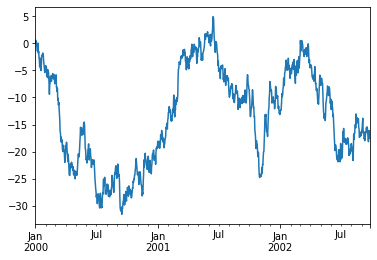

In [143]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

데이터프레임에서 [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

<Figure size 432x288 with 0 Axes>

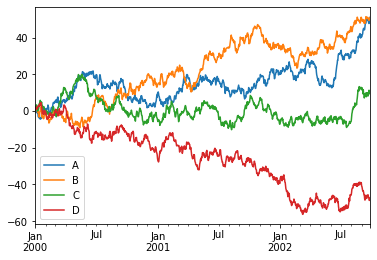

In [144]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## 12. Getting Data In / Out (데이터 입 / 출력)

### CSV

[csv 파일에 씁니다.](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [145]:
df.to_csv('foo.csv')

[csv 파일을 읽습니다.](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [146]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.218595,-0.270654,0.153881,0.644591
1,2000-01-02,2.212506,1.377502,1.794741,2.086978
2,2000-01-03,0.832892,1.359415,2.451803,2.066917
3,2000-01-04,-0.893484,1.082835,2.932478,1.457873
4,2000-01-05,0.747530,1.113115,3.319548,1.076956
...,...,...,...,...,...
995,2002-09-22,47.906570,49.556528,9.609421,-47.221320
996,2002-09-23,47.671415,49.353200,11.308364,-47.245735
997,2002-09-24,47.822482,49.740872,10.935801,-48.743709
998,2002-09-25,50.414646,50.717678,9.334884,-48.023769


### HDF5
[HDFStores](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)에 읽고 씁니다.



In [148]:
# HDF5 Store에 씁니다.
df.to_hdf('foo.h5','df')

In [149]:
# HDF5 Store에서 읽어옵니다.
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,1.218595,-0.270654,0.153881,0.644591
2000-01-02,2.212506,1.377502,1.794741,2.086978
2000-01-03,0.832892,1.359415,2.451803,2.066917
2000-01-04,-0.893484,1.082835,2.932478,1.457873
2000-01-05,0.747530,1.113115,3.319548,1.076956
...,...,...,...,...
2002-09-22,47.906570,49.556528,9.609421,-47.221320
2002-09-23,47.671415,49.353200,11.308364,-47.245735
2002-09-24,47.822482,49.740872,10.935801,-48.743709
2002-09-25,50.414646,50.717678,9.334884,-48.023769


### Excel
[MS Excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)에 읽고 씁니다.

In [150]:
# 엑셀 파일에 씁니다.
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [151]:
# 엑셀 파일을 읽어옵니다.
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.218595,-0.270654,0.153881,0.644591
1,2000-01-02,2.212506,1.377502,1.794741,2.086978
2,2000-01-03,0.832892,1.359415,2.451803,2.066917
3,2000-01-04,-0.893484,1.082835,2.932478,1.457873
4,2000-01-05,0.747530,1.113115,3.319548,1.076956
...,...,...,...,...,...
995,2002-09-22,47.906570,49.556528,9.609421,-47.221320
996,2002-09-23,47.671415,49.353200,11.308364,-47.245735
997,2002-09-24,47.822482,49.740872,10.935801,-48.743709
998,2002-09-25,50.414646,50.717678,9.334884,-48.023769


## 13. Gotchas (잡았다!)
**연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.**

In [154]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: ignored

In [155]:
# 이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 합니다.
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None


위에 대한 설명과 자세한 내용은 [비교](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) 부분을 참조하세요.

[Gotchas](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html) 부분도 참조하세요.








---

본 자료의 저작권은 [BSD-3-Clause](https://opensource.org/licenses/BSD-3-Clause)인 점을 참조하여 주세요.

This documentation is a Korean translation material of ‘10 Minutes to Pandas’. Every members of DATAITGIRLS2 program participated in the translation. If you want to know about [DATAITGIRLS2 program, please visit DATAITGIRLS2 program’s homepage.](https://annefromk.github.io/dataitgirls2/)

The copyright conditions of this documentation are BSD-3-Clause.
